<a href="https://colab.research.google.com/github/Sudo-CHRIS-dev/MachineLearning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset 1 : Car Insurance Data

- 1.) Kaggle
- 2.) The data has to do with car insurance
- 3.) if a customer has claimed his/her loan
- 4.) A row represents a person
- 5.) Classification
- 6.) 19 features
- 7.) 10000
- 8.) I currently see no challenges

# Dataset 2 : Adult income dataset

- 1.) Kaggle
- 2.) The data has to do with adult income
- 3.) Income
- 4.) A row represents a person
- 5.) Classification
- 6.) 16 features
- 7.) 48842
- 8.) I currently see no challenges

#Imports

In [2]:
# import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load data frame
FilePath = "/content/Car_Insurance_Claim.csv"
Insurance_df = pd.read_csv(FilePath)
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#Cleaning and Visualization

##Delete unnecessary columns.

In [4]:
Insurance_df.drop(columns = ['ID'], inplace=True)

##Deleted duplicate rows.

In [5]:
# Let's checked for duplicate values
Insurance_df.duplicated().sum()

12

In [6]:
# We have duplicates so it's time to get rid of them
Insurance_df.drop_duplicates(inplace=True)

# now let's make sure they are gone
Insurance_df.duplicated().sum()

0

##Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [7]:
#Check for any inconsistent values in categorical columns.
objectcols = Insurance_df.select_dtypes('object').columns
# loop through the list of string columns
for column in objectcols:
  # print the value counts for the column
  print(Insurance_df[column].value_counts())
  # Print an empty line for readability
  print()

26-39    3062
40-64    2931
16-25    2005
65+      1990
Name: AGE, dtype: int64

female    5003
male      4985
Name: GENDER, dtype: int64

majority    9000
minority     988
Name: RACE, dtype: int64

0-9y      3519
10-19y    3298
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

high school    4151
university     3927
none           1910
Name: EDUCATION, dtype: int64

upper class      4335
middle class     2138
poverty          1804
working class    1711
Name: INCOME, dtype: int64

before 2015    6955
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

sedan         9511
sports car     477
Name: VEHICLE_TYPE, dtype: int64



##Identified outliers.

In [8]:
#Check for any impossible values in numeric columns.
Insurance_df.describe(include='number')

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,9988.000000,9988.000000,9988.000000,9988.00000,9034.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,0.515813,0.697537,0.498698,0.689327,19873.85873,11694.598185,1.484581,0.239487,1.057369,0.312775
std,0.137688,0.459348,0.500023,0.462792,18923.83540,2818.004386,2.242766,0.555262,1.653047,0.463647
min,0.053358,0.000000,0.000000,0.000000,10238.00000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.00000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.00000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.00000,14000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.00000,22000.000000,22.000000,6.000000,15.000000,1.000000


##Identified and addressed missing values.

In [9]:
#Check for missing values
Insurance_df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [10]:
# handle missing values by using an appropriate imputation strategy
# For EDA I am going to use placeholders, I will mak a copy to not interfere with machine learning and avoid *data leakage*
EDA_Insurance_df = Insurance_df.copy()
EDA_Insurance_df["CREDIT_SCORE"].fillna(0.515813, inplace=True)
EDA_Insurance_df["ANNUAL_MILEAGE"].fillna(11694.598185, inplace=True)

# I used this Impute strategy as I know the averages, in order to be able to include the rows with
# missing values in my EDA I have made the missing values the average values.

##Produced univariate visuals for the target and all features.

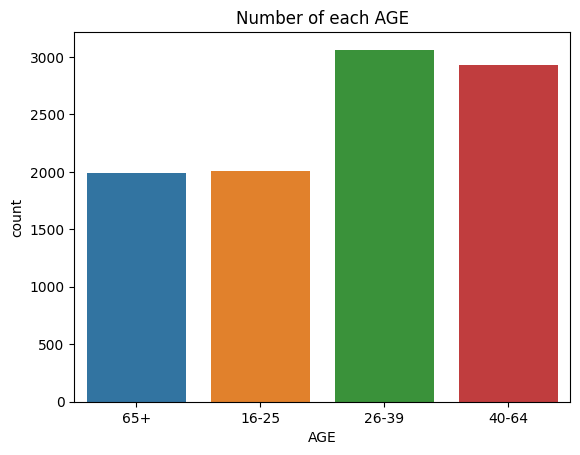

In [11]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='AGE')
ax.set_title('Number of each AGE');

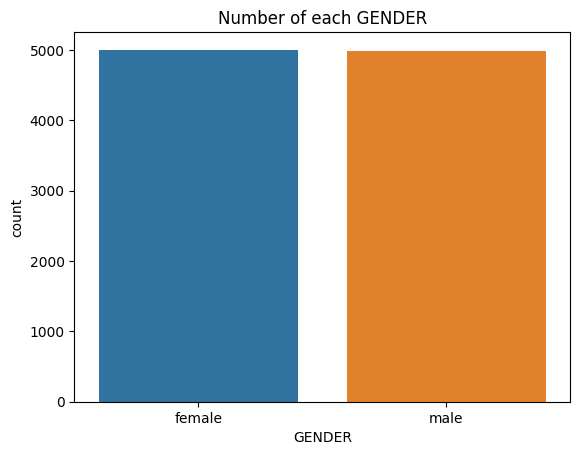

In [12]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='GENDER')
ax.set_title('Number of each GENDER');

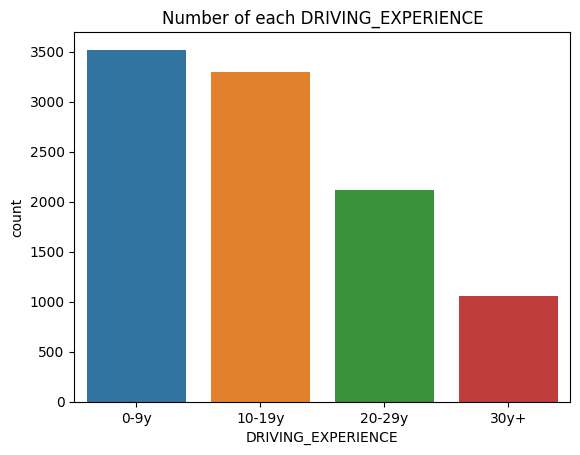

In [13]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='DRIVING_EXPERIENCE')
ax.set_title('Number of each DRIVING_EXPERIENCE');

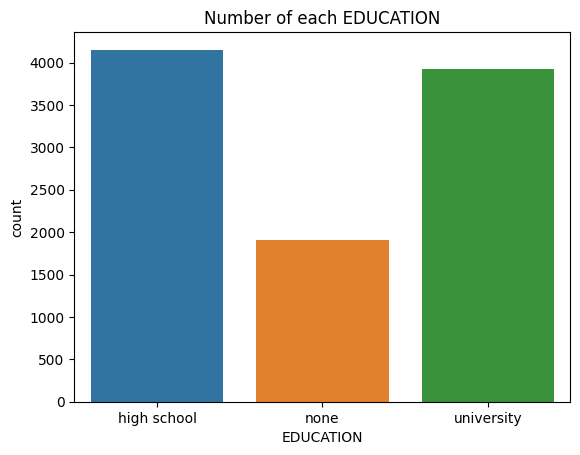

In [14]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='EDUCATION')
ax.set_title('Number of each EDUCATION');

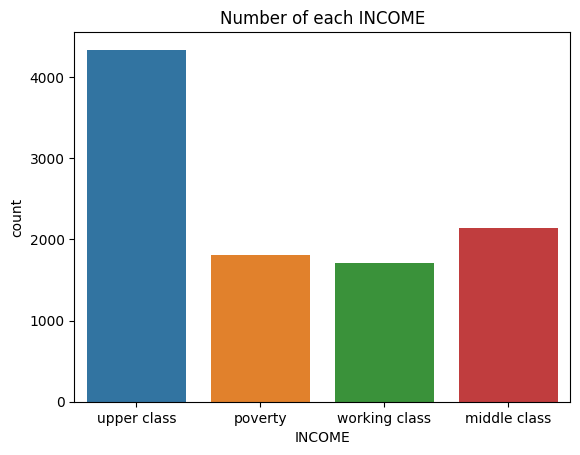

In [15]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='INCOME')
ax.set_title('Number of each INCOME');

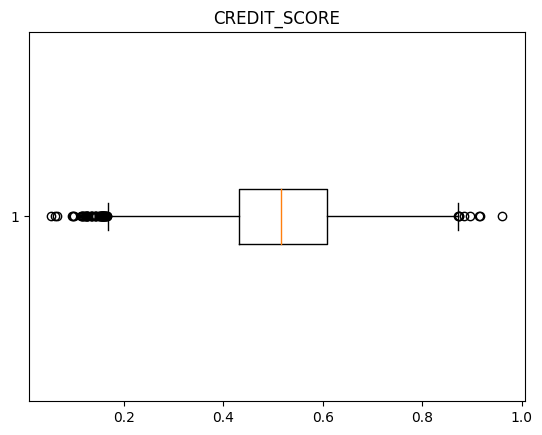

In [16]:
## Define a MatplotLib ax
fig, ax = plt.subplots()
ax.boxplot(EDA_Insurance_df['CREDIT_SCORE'], vert=False);

## Set the Title
ax.set_title('CREDIT_SCORE');

***Many outliers below 0.2 and above 0.9***

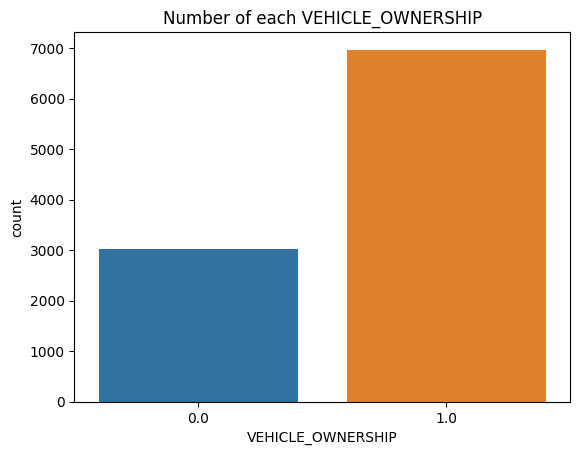

In [17]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_OWNERSHIP')
ax.set_title('Number of each VEHICLE_OWNERSHIP');

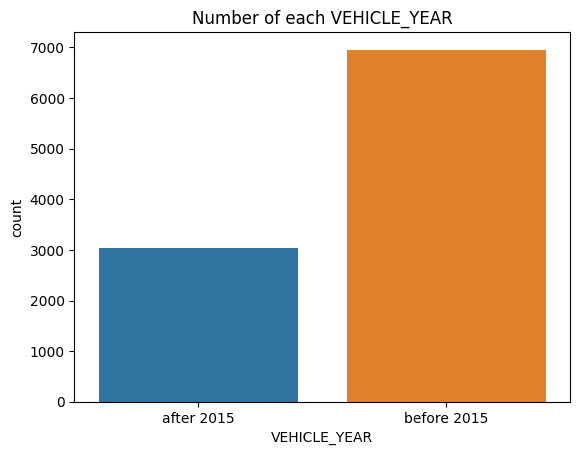

In [18]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_YEAR')
ax.set_title('Number of each VEHICLE_YEAR');

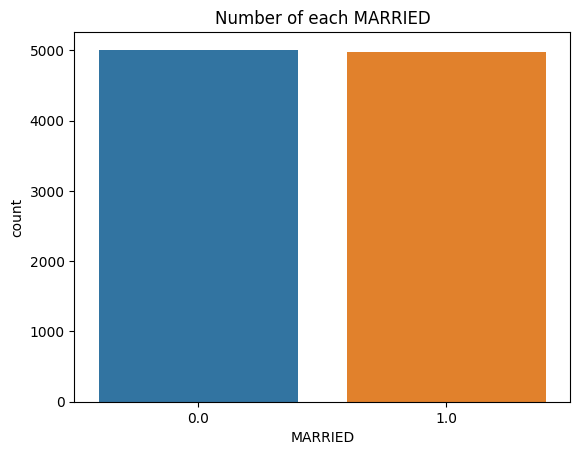

In [19]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='MARRIED')
ax.set_title('Number of each MARRIED');

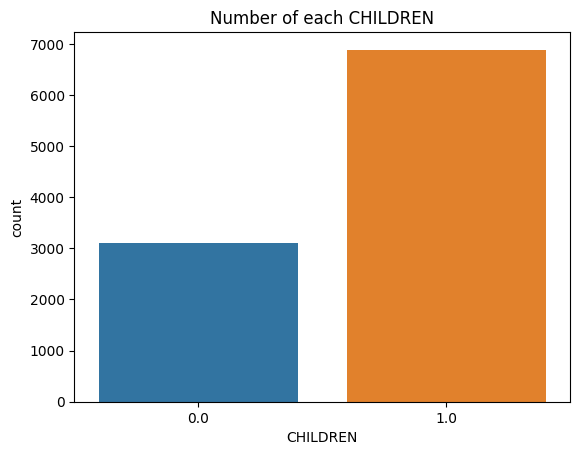

In [20]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='CHILDREN')
ax.set_title('Number of each CHILDREN');

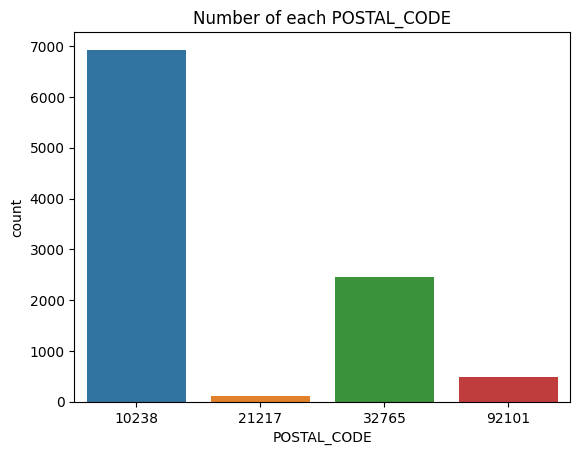

In [21]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='POSTAL_CODE')
ax.set_title('Number of each POSTAL_CODE');

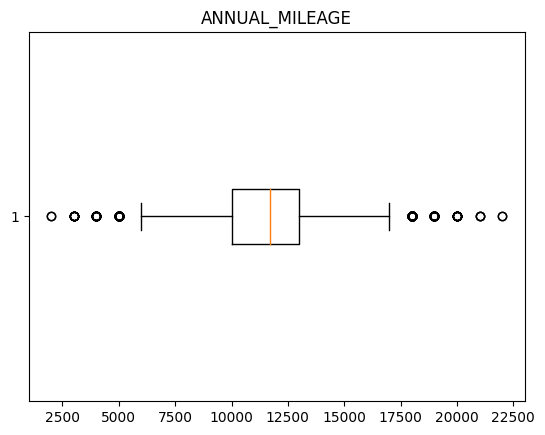

In [22]:
## Define a MatplotLib ax
fig, ax = plt.subplots()
ax.boxplot(EDA_Insurance_df['ANNUAL_MILEAGE'], vert=False);

## Set the Title
ax.set_title('ANNUAL_MILEAGE');

***Many Outliers below 5500 and above 17500***

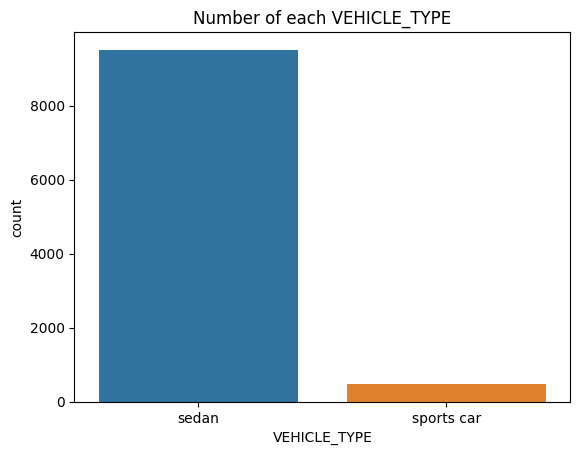

In [23]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_TYPE')
ax.set_title('Number of each VEHICLE_TYPE');

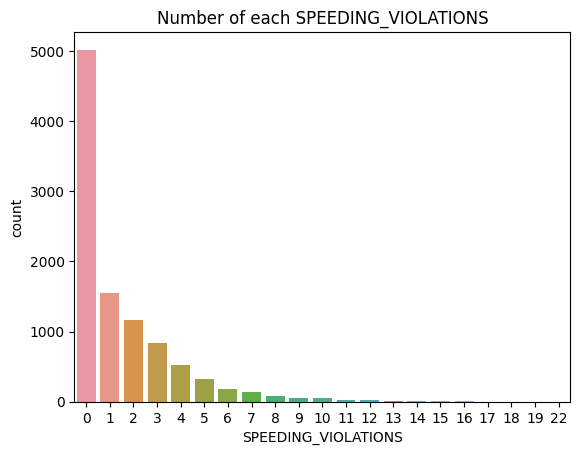

In [24]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='SPEEDING_VIOLATIONS')
ax.set_title('Number of each SPEEDING_VIOLATIONS');

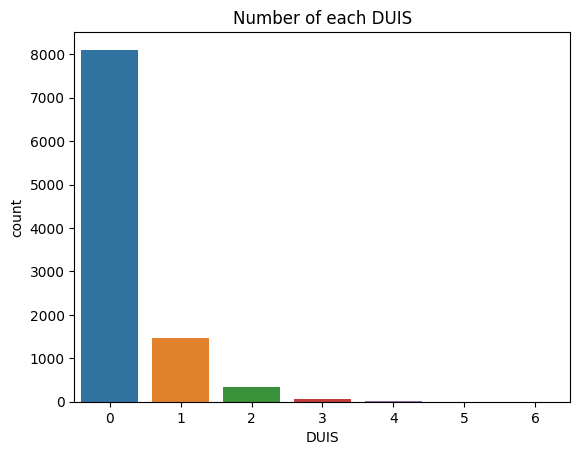

In [25]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='DUIS')
ax.set_title('Number of each DUIS');

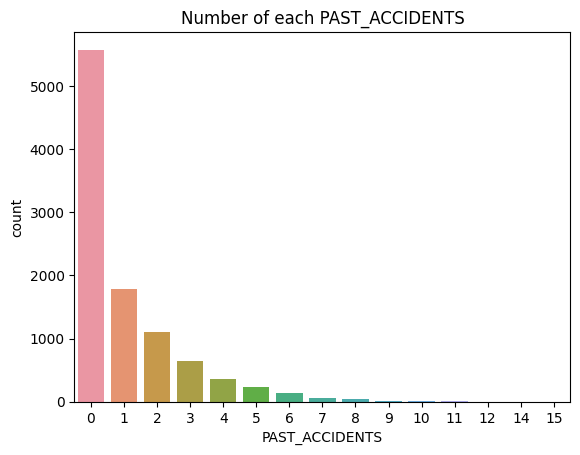

In [26]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='PAST_ACCIDENTS')
ax.set_title('Number of each PAST_ACCIDENTS');

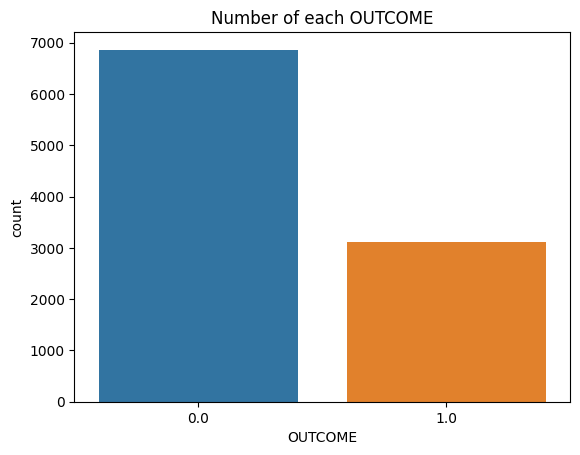

In [27]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='OUTCOME')
ax.set_title('Number of each OUTCOME');

## Part 3

###For this part of the project, you will continue your data exploration by:

<ipython-input-28-6f904f88c914>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Insurance_df.corr()


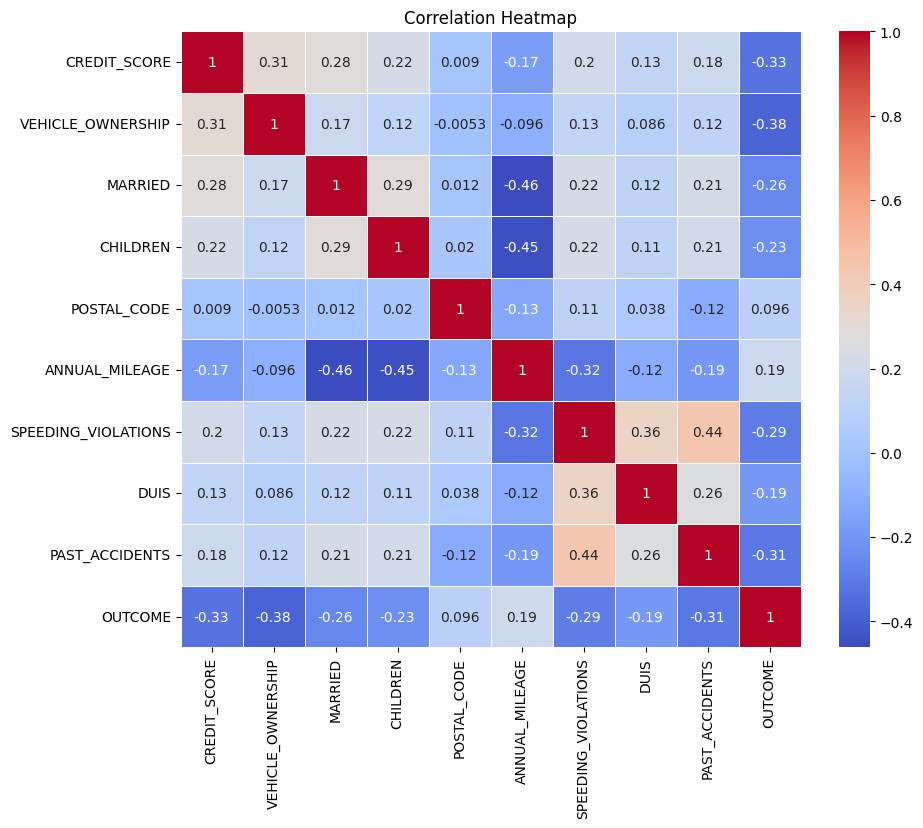

In [28]:
#Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
correlation = Insurance_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

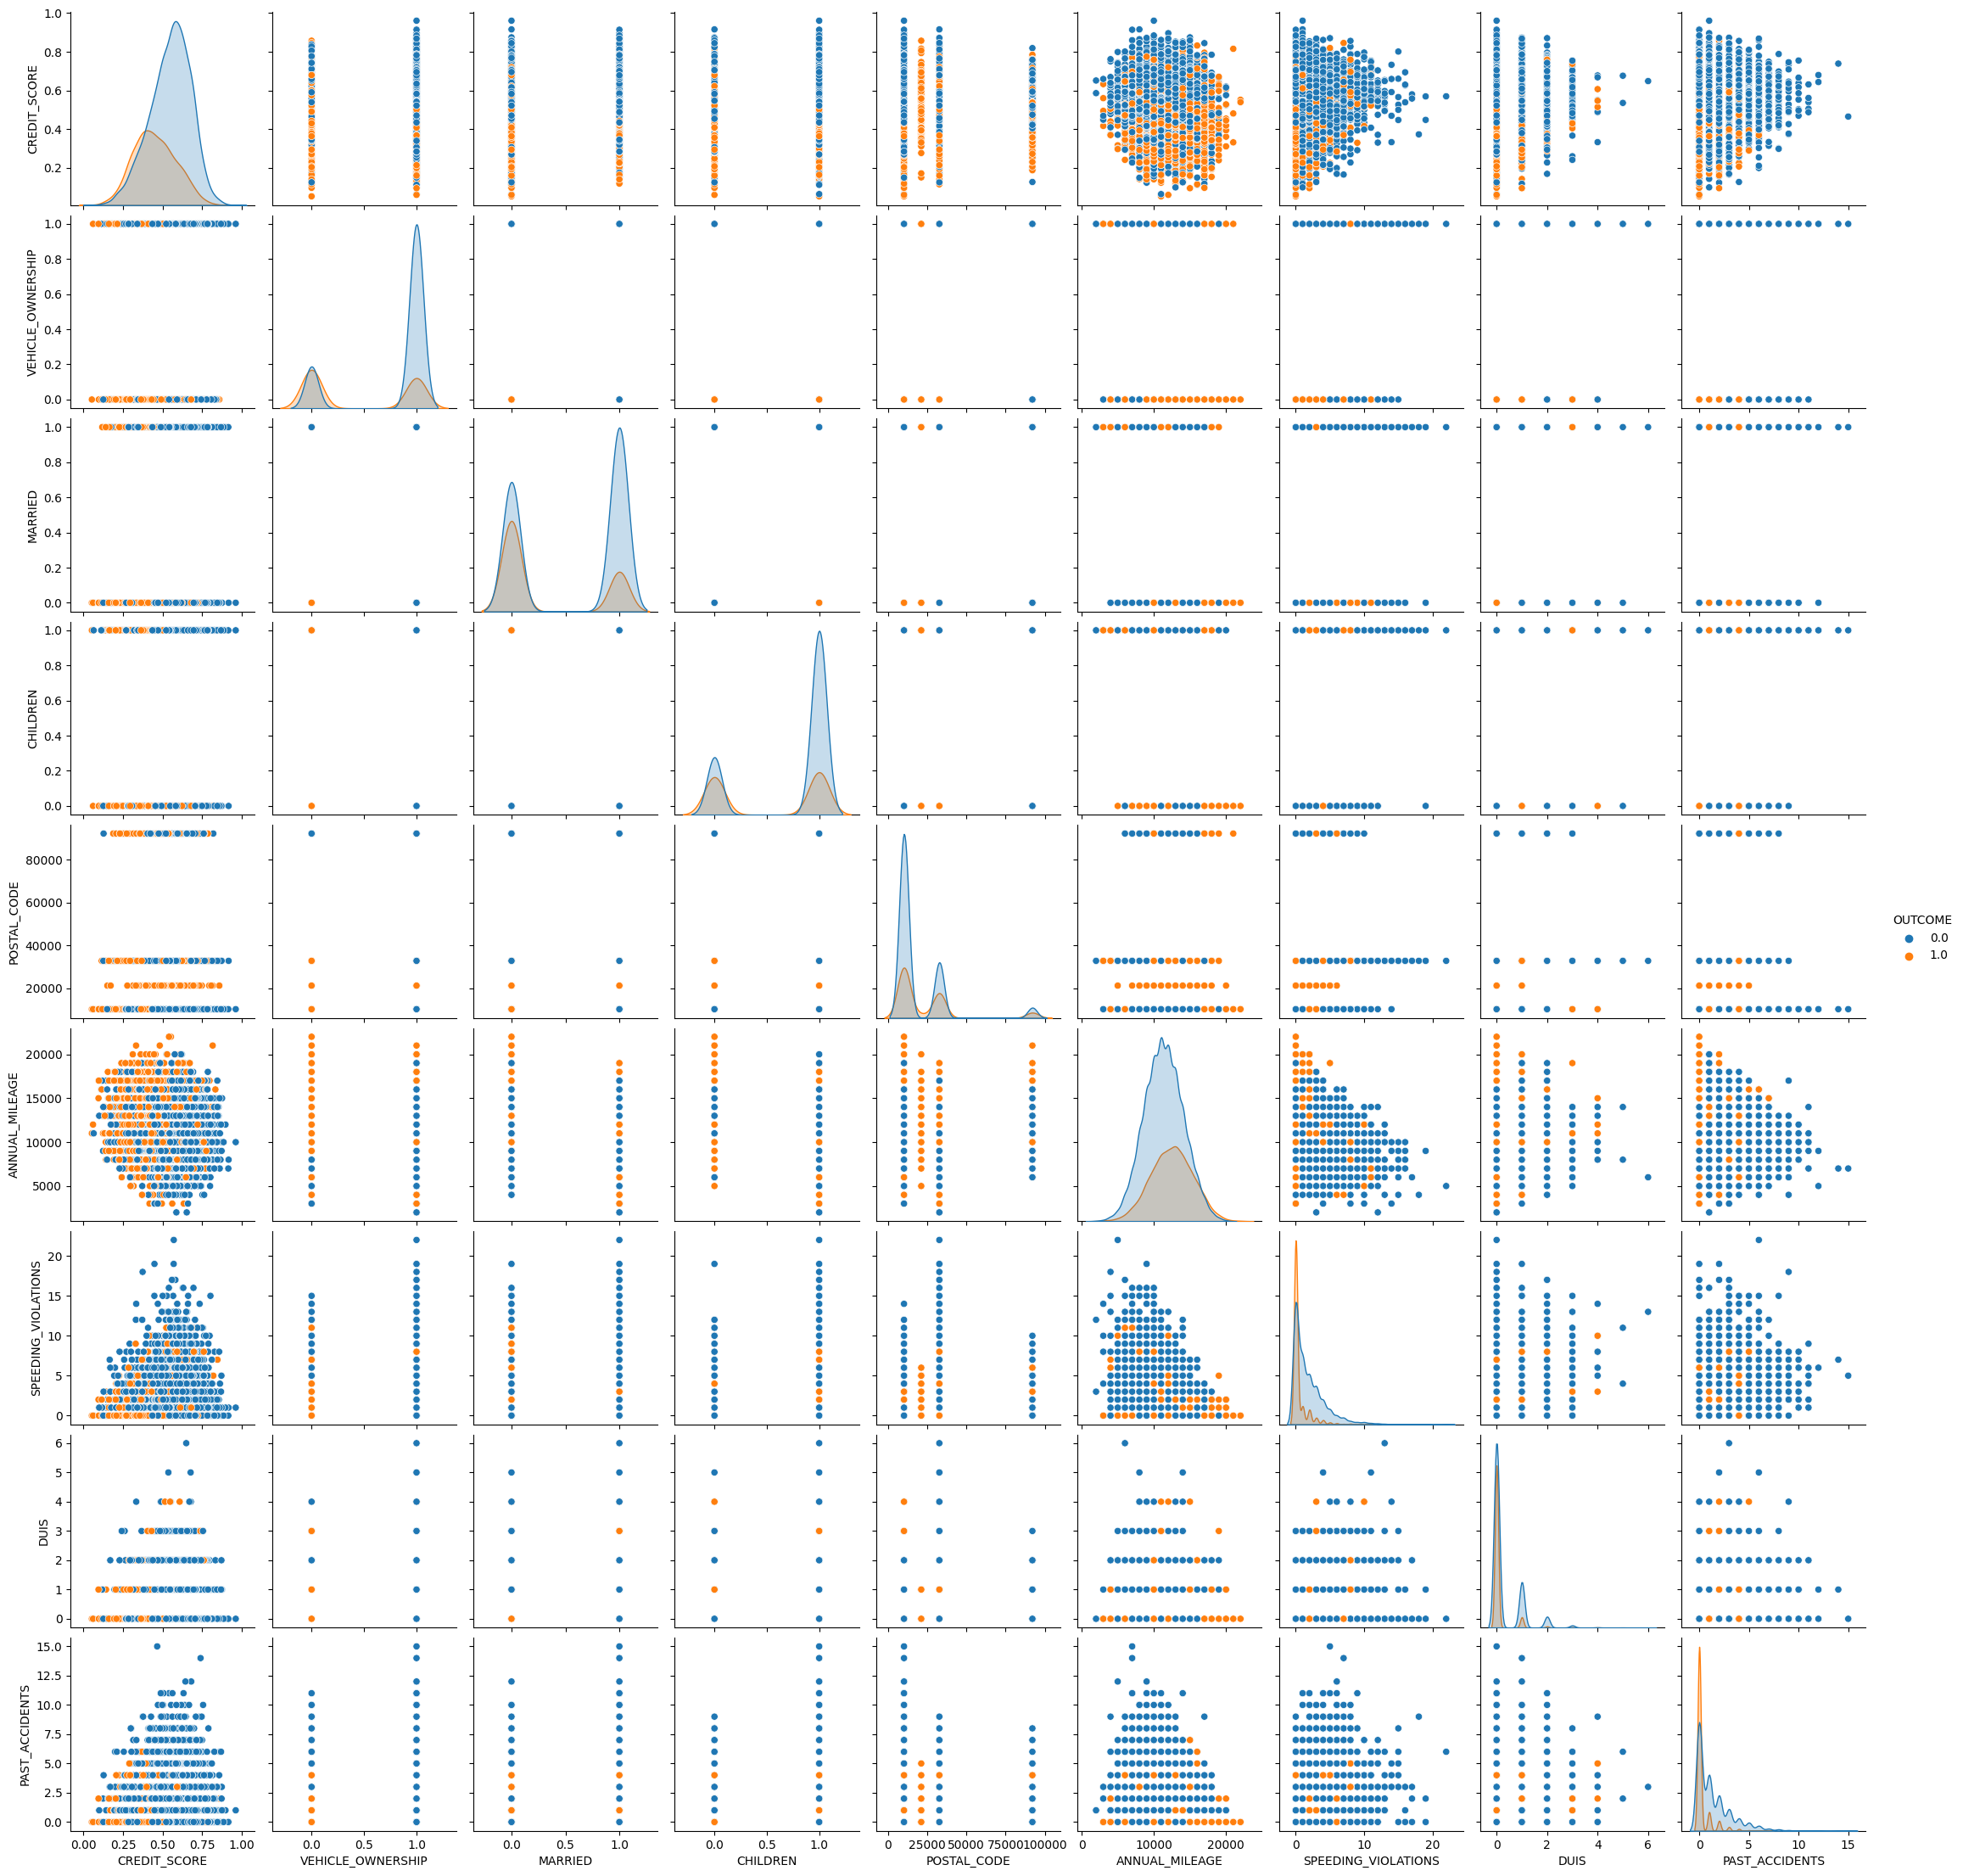

In [29]:
# Let's just show all the plots and pick our favorite
sns.pairplot(Insurance_df, hue='OUTCOME')

##Visuals


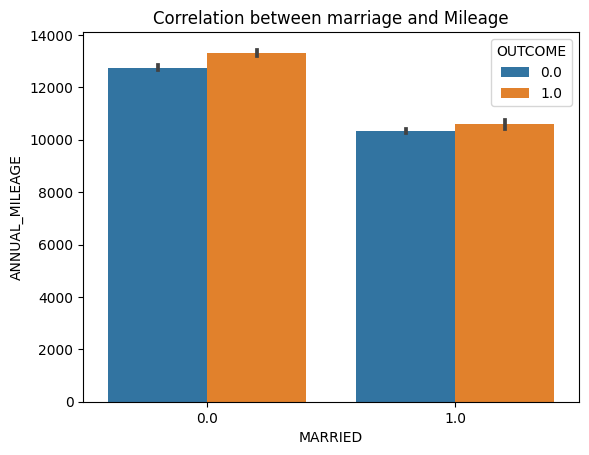

In [30]:
# Plot the data for Visual 1
plt.title("Correlation between marriage and Mileage")
ax = sns.barplot(x = 'MARRIED', y = 'ANNUAL_MILEAGE',hue = 'OUTCOME' , data = Insurance_df)

***This graph shows that when the customer is married, they tend to have far less mileage, I chose this visual as I beleive it is a key roleplayer in the outcome. I beleive it correlates to the outcome as married people have family responsibilities and will drive safe due to the fact that they have another persons life to consider when driving.***

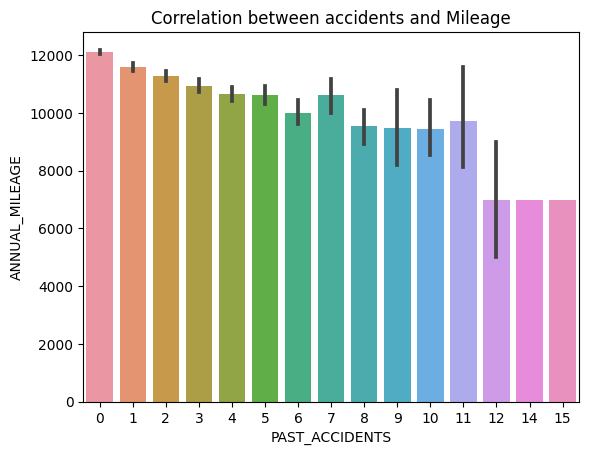

In [32]:
# Plot the data for Visual 2
plt.title("Correlation between accidents and Mileage")
ax = sns.barplot( y='ANNUAL_MILEAGE', x='PAST_ACCIDENTS', data = Insurance_df)

***From this visual we can see that the more accidents people are in, the less mielage they tend to have, this is due to the fact that bad drivers tend to drive less, but because they are bad drivers they get into more accidents.***